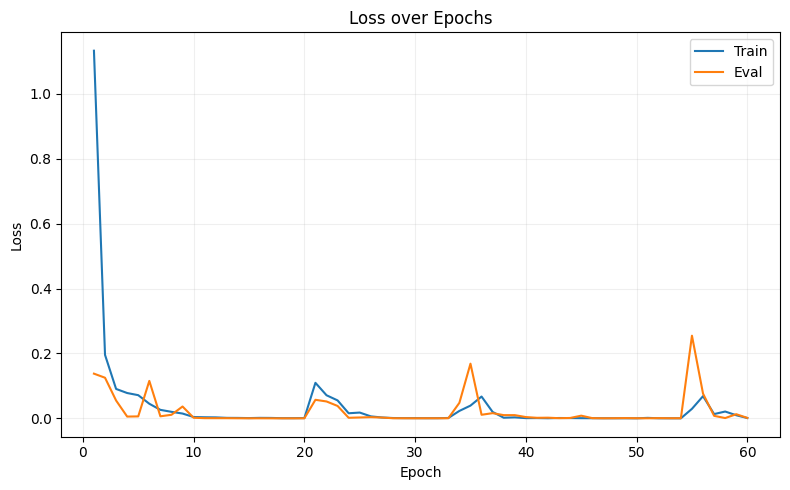

In [ ]:
import re
import matplotlib.pyplot as plt

# Path to the training log
log_file = r'/SlowfastTrainer/Models/Idle_E60_C16_Cam10718/SlowFast_training_log.txt'

# Initialize metric lists
epochs = []
train_loss, eval_loss = [], []
train_acc, eval_acc = [], []
train_prec, eval_prec = [], []
train_rec, eval_rec = [], []
train_f1, eval_f1 = [], []

# Read and parse the file
with open(log_file, 'r') as file:
    lines = file.readlines()

for line in lines:
    epoch_match = re.match(r'Epoch (\d+)/\d+', line)
    if epoch_match:
        epochs.append(int(epoch_match.group(1)))

    train_match = re.match(r'Train Loss: ([\d.]+), Accuracy: ([\d.]+), Precision: ([\d.]+), Recall: ([\d.]+), F1: ([\d.]+)', line)
    if train_match:
        train_loss.append(float(train_match.group(1)))
        train_acc.append(float(train_match.group(2)))
        train_prec.append(float(train_match.group(3)))
        train_rec.append(float(train_match.group(4)))
        train_f1.append(float(train_match.group(5)))

    eval_match = re.match(r'Eval Loss: ([\d.]+), Accuracy: ([\d.]+), Precision: ([\d.]+), Recall: ([\d.]+), F1: ([\d.]+)', line)
    if eval_match:
        eval_loss.append(float(eval_match.group(1)))
        eval_acc.append(float(eval_match.group(2)))
        eval_prec.append(float(eval_match.group(3)))
        eval_rec.append(float(eval_match.group(4)))
        eval_f1.append(float(eval_match.group(5)))

# Plotting
def plot_metric(train, eval, title, ylabel):
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train, label='Train')
    plt.plot(epochs, eval, label='Eval')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, alpha = 0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_metric(train_loss, eval_loss, 'Loss over Epochs', 'Loss')



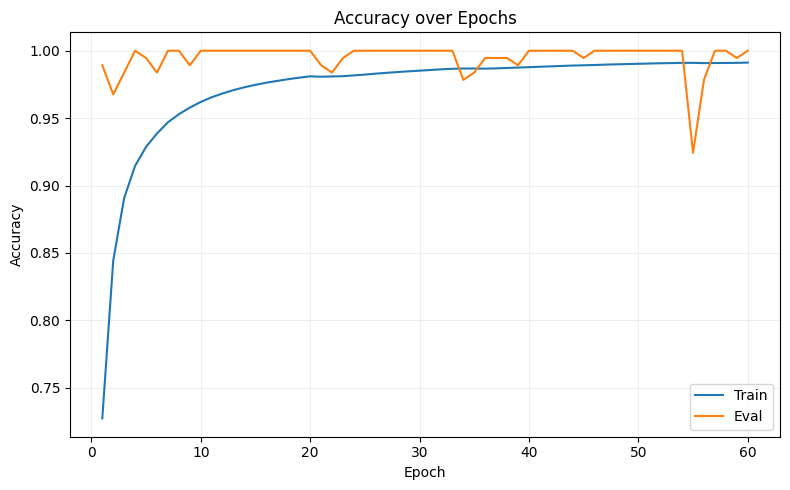

In [2]:
plot_metric(train_acc, eval_acc, 'Accuracy over Epochs', 'Accuracy')


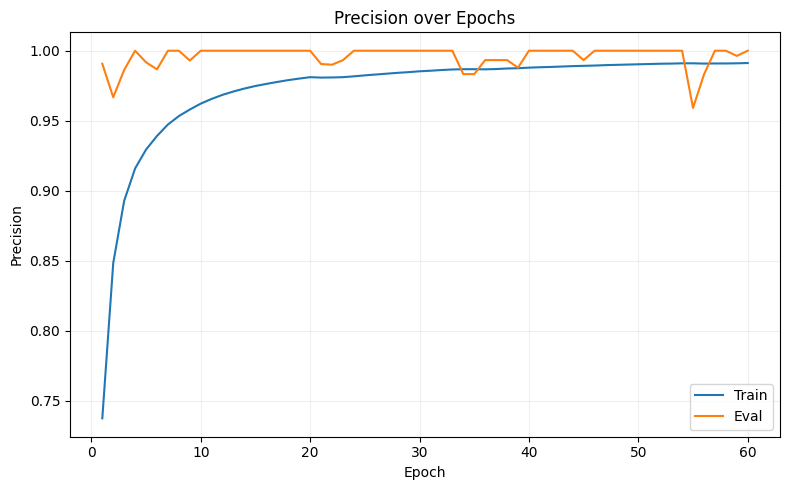

In [3]:
plot_metric(train_prec, eval_prec, 'Precision over Epochs', 'Precision')


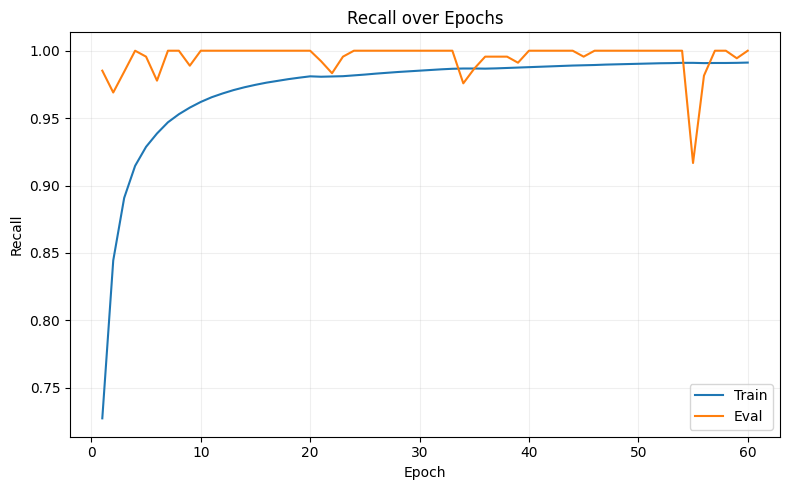

In [4]:
plot_metric(train_rec, eval_rec, 'Recall over Epochs', 'Recall')


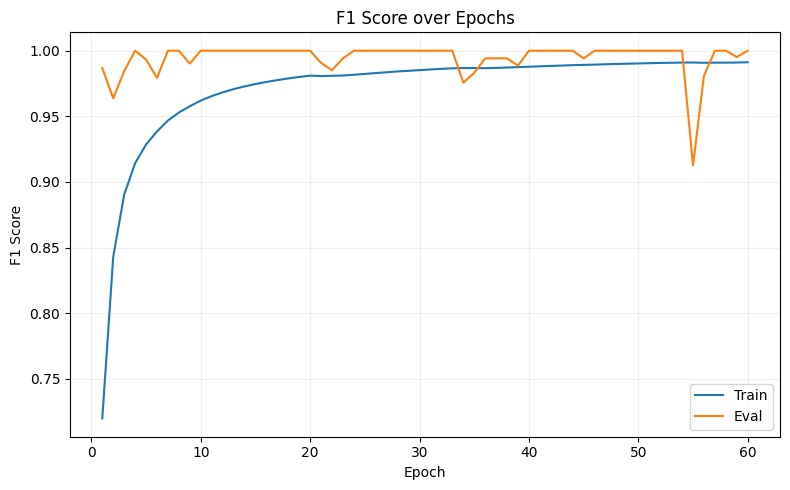

In [5]:
plot_metric(train_f1, eval_f1, 'F1 Score over Epochs', 'F1 Score')